In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Create data

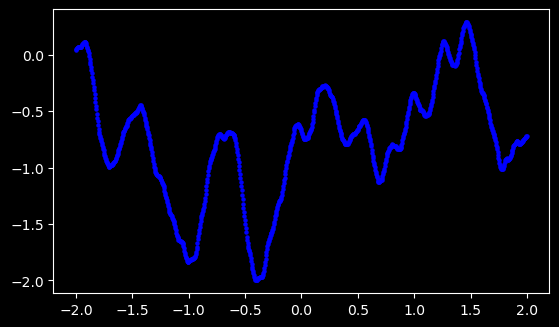

In [119]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
#y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
window = 30
y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
y = y / y.abs().max() * 2
y = y.values

plt.scatter(x, y, c='b', s=5)
plt.gca().set_aspect('equal')
plt.show()

# Modeling

## Preprocessing

In [120]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y[:, np.newaxis])[:,0]
""";

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

## Create models

model1 has a single layer. model2 has several layers.

In [122]:
X.shape

(1000, 1)

In [64]:
#!pip isntall tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [70]:
# Model 1
model = Sequential([
    Input(shape=X.shape[1:]),
    Dense(units=1, activation='tanh'),
])

model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mse']
)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [123]:
from tensorflow.keras.optimizers import Adam

# Model 2
model = Sequential([
    Input(shape=X.shape[1:]),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error')

model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

## Train model

In [124]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    #steps_per_epoch=10,
    shuffle=True,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4002 - val_loss: 0.2554
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2362 - val_loss: 0.1552
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1486 - val_loss: 0.1088
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1302 - val_loss: 0.1049
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1317 - val_loss: 0.1087
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1278 - val_loss: 0.1005
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1262 - val_loss: 0.0821
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1060 - val_loss: 0.0783
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1061 - val_loss: 0.0767
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0881 - val_loss: 0.0930
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0995 - val_loss: 0.0637
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

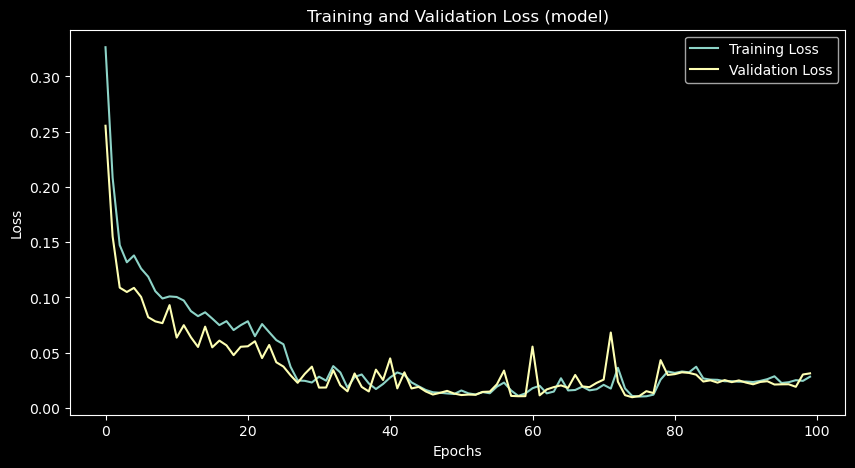

In [125]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0,max(max(history.history['loss']),max(history.history['val_loss'])))
plt.legend()

## Check model performance

In [126]:
y_pred = model.predict(X)[:,0]
y_pred[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([-0.4225343 , -0.4261583 , -0.42978233, -0.4334066 , -0.43703073],
      dtype=float32)

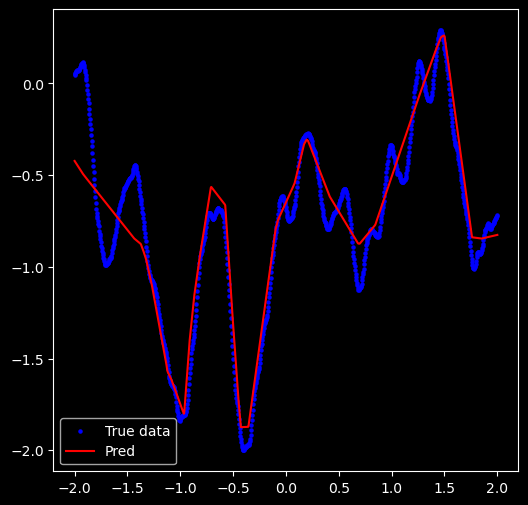

In [127]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, c='b', s=5, label="True data")
plt.plot( x, y_pred, 'r', label="Pred" )
#plt.gca().set_aspect('equal')
plt.legend()
plt.show()

## Extrapolate model beyond training limits

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


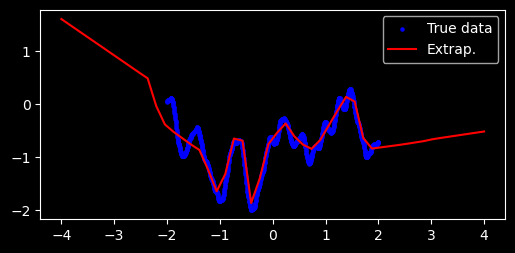

In [128]:
x_ext = np.linspace(-4,4,50)
X_ext = x_ext[:,np.newaxis]
#X_ext = X_ext % 2

y_ext = model.predict(X_ext)

plt.figure(figsize=(6,6))
plt.scatter(x, y, c='b', s=5, label="True data")
plt.plot( x_ext, y_ext, 'r', label="Extrap." )
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

## Examine model weights

In [129]:
for i, layer in enumerate(model.layers):
    print(f"Weights of layer {i}:")
    print(f'\tWeights: {layer.get_weights()[0]}')
    print(f'\tBiasess: {layer.get_weights()[1]}')
    print()
# end

Weights of layer 0:
	Weights: [[ 0.8973095   0.86081386 -0.607719   -0.01623233 -0.6630976   1.0716068
   0.06822006  0.06064677 -0.85713506 -0.26773673]]
	Biasess: [-0.1758486  -0.17856689 -0.27272412 -0.07067573 -0.1501368   0.38111943
  0.31045997 -0.01781427 -0.36546174 -0.21891426]

Weights of layer 1:
	Weights: [[ 0.15556787 -0.1859593   0.34264696 -1.6674125  -0.6259199   0.13151258
  -0.0309028   0.4151631   0.2306167   0.09666743]
 [-0.57433516  0.01274859 -0.14377034 -1.009839    0.12419429 -0.3249766
   0.20957804  0.53652656  0.36035028  0.14695288]
 [ 0.06397196 -0.9102358  -0.6490557  -0.02222326 -0.29014918 -0.64610726
   0.02083021 -0.48672685  0.23786414 -0.21554439]
 [ 0.46688023 -0.03581551 -0.23886447 -0.02377666 -0.07196517  0.10361791
  -0.5443717  -0.23498973  0.0890049   0.55484986]
 [ 0.7493959  -0.4230976   0.19848481  0.12762667  0.3864034  -0.21137534
  -0.37231362 -0.35130513 -0.32634705 -0.35463753]
 [-0.07079511  0.35680398 -2.1879256   0.8137437  -1.4092